# **Great Recession Impact on California Hospital Finance**

Chenxi Li

Project Milestone 1

CMPS-3160: Introduction to Data Science - Dr. Rebecca Faust

[link to my github page](https://github.com/ChenxiLiD/ChenxiLiD.github.io)


## **I Introduction**

The financial crisis of 2008, often referred to as the Great Recession, severely impacted the global economy, causing massive job losses, credit freezing, and sharp drops in asset values. While the macroeconomic impacts are well-documented, I am curious how institutions such as hospitals responded to this financial disruption.


Hospitals are the cornerstones of the healthcare delivery system, falling primarily into two types: public and private. Public hospitals rely heavily on government funding, while private hospitals are typically market-driven, often operating to generate a profit.

In this project, I explore how these two types of hospitals reacted to the financial crisis using data from the California Health and Human Services Open Data Portal (*2007–2010*).

#### **Project Goal**:

In this project, I study three main questions:

1. What was the magnitude and trend of change in hospital revenue (including both operating and non-operating income) between the pre-crisis and post-crisis periods?

2. Did the Great Recession correlate with a statistically significant increase in hospital closures in California?

3. How did the vulnerability to closure differ across public versus private hospital ownership types?

#### **Project Dataset**:

I am working with [Pre-2012 Hospital Annual Financial Data](https://data.chhs.ca.gov/dataset/pre-2012-hospital-annual-financial-data-selected-data-pivot-tables?__no_cache__=True) (2007-2010) from the [California Health and Human Services Open Data Portal](https://data.chhs.ca.gov/).

This dataset contains detailed facility-level data which includs services capacity, inpatient and outpatient utilization, patient demographics, detailed revenues and expenses by type and payer, as well as the complete balance sheet and income statement of California hospitals from 2001 to 2023. Since this is a large dataset with hundreds of variables, no other data sources are needed to explore the above three questions. In this project, I will focus on the 2007–2010 period.

## **II Extraction, Transform, and Load (ETL)**

I extracted the dataset.xls file from [Pre-2012 Hospital Annual Financial Data](https://data.chhs.ca.gov/dataset/pre-2012-hospital-annual-financial-data-selected-data-pivot-tables?__no_cache__=True) and loaded it as a Pandas dataframe. For California hospitals, this dataset includes facility numbers, facility names, location (county, address), type of control, type of care, revenues, debts, number of beds, number of visits, and other characteristic or financial variables.

I focus on year [2007](https://data.chhs.ca.gov/dataset/pre-2012-hospital-annual-financial-data-selected-data-pivot-tables/resource/7201f4f2-507b-4a1a-954d-aba43f1a2e9a), [2008](https://data.chhs.ca.gov/dataset/pre-2012-hospital-annual-financial-data-selected-data-pivot-tables/resource/a8870d38-bd9a-4763-b258-5325d78d4b4e), [2009](https://data.chhs.ca.gov/dataset/pre-2012-hospital-annual-financial-data-selected-data-pivot-tables/resource/eae4947f-3db7-4f03-83cc-99d89a2b5266), [2010](https://data.chhs.ca.gov/dataset/pre-2012-hospital-annual-financial-data-selected-data-pivot-tables/resource/e913dd01-1972-4e2c-bb93-4a07bb600d41), each of them is downloaded from a seperate page.

Since several sheets were saved in each original xls file (profile, charts, pivot, data), I saved the datasets as separate csv files and will use them in the following analysis.

In [90]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Read datasets from my github
base_url = "https://raw.githubusercontent.com/ChenxiLiD/ChenxiLiD.github.io/main/"

df_2007 = pd.read_csv(base_url + "hafd2007.csv")
df_2007["year"] = 2007

df_2008 = pd.read_csv(base_url + "hafd2008.csv")
df_2008["year"] = 2008

df_2009 = pd.read_csv(base_url + "hafd2009.csv")
df_2009["year"] = 2009

df_2010 = pd.read_csv(base_url + "hafd2010.csv")
df_2010["year"] = 2010

# Concatenate all years
merged_df = pd.concat([df_2007, df_2008, df_2009, df_2010], ignore_index=True)

# Sort by fac_no and year
merged_df = merged_df.sort_values(by=["fac_no", "year"]).reset_index(drop=True)

# Display data types
display(merged_df.dtypes)

merged_df.head(15)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
fac_no,float64
fac_name,object
beg_date,object
end_date,object
day_per,float64
...,...
pd_hr_no,float64
year,int64
days_pips,float64
curr_liab,float64


,fac_no,fac_name,beg_date,end_date,day_per,data_ind,audit_ind,county,hsa,hfpa,...,pd_hr_anc,pd_hr_ed,pd_hr_gen,pd_hr_fis,pd_hr_adm,pd_hr_no,year,days_pips,curr_liab,pd_hr_non
0,106010735.0,alameda hospital,7/1/2006,6/30/2007,365.0,audited,excl. ind. audit,alameda,5.0,417.0,...,268130.0,0.0,193855.0,76531.0,111427.0,0.0,2007,NaN,NaN,NaN
1,106010735.0,alameda hospital,01jul2007,30jun2008,366.0,audited,incl. ind. audit adj.,alameda,5.0,417.0,...,233761.0,0.0,171105.0,61927.0,106270.0,NaN,2008,0.0,21567456.0,0.0
2,106010735.0,alameda hospital,01jul2008,30jun2009,365.0,audited,incl. ind. audit adj.,alameda,5.0,417.0,...,251334.0,0.0,170582.0,61757.0,98728.0,NaN,2009,0.0,17993828.0,0.0
3,106010735.0,alameda hospital,01jul2009,30jun2010,365.0,audited,incl. ind. audit adj.,alameda,5.0,417.0,...,242302.0,0.0,173000.0,67170.0,102760.0,NaN,2010,0.0,17796961.0,0.0
4,106010739.0,alta bates summit med ctr-alta bates campus,1/1/2007,12/31/2007,365.0,audited,incl. ind. audit,alameda,5.0,415.0,...,1198927.0,9832.0,809787.0,166609.0,457112.0,0.0,2007,NaN,NaN,NaN
5,106010739.0,alta bates summit med ctr-alta bates campus,01jan2008,31dec2008,366.0,audited,incl. ind. audit adj.,alameda,5.0,415.0,...,1231700.0,6864.0,827007.0,165854.0,448426.0,NaN,2008,0.0,74610947.0,0.0
6,106010739.0,alta bates summit med ctr-alta bates campus,01jan2009,31dec2009,365.0,audited,incl. ind. audit adj.,alameda,5.0,415.0,...,1197113.0,6970.0,782664.0,149704.0,425056.0,NaN,2009,0.0,52083859.0,0.0
7,106010739.0,alta bates summit med ctr-alta bates campus,01jan2010,31dec2010,365.0,audited,incl. ind. audit adj.,alameda,5.0,415.0,...,1250572.0,2259.0,729650.0,88636.0,558553.0,NaN,2010,0.0,83814908.0,80.0
8,106010776.0,childrens hosp & research ctr of oakland,1/1/2007,12/31/2007,365.0,audited,incl. ind. audit,alameda,5.0,417.0,...,865782.0,847063.0,657031.0,193270.0,225399.0,98818.0,2007,NaN,NaN,NaN
9,106010776.0,childrens hospital & research center at oakland,01jan2008,31dec2008,366.0,audited,incl. ind. audit adj.,alameda,5.0,417.0,...,918040.0,822074.0,680412.0,219557.0,242199.0,NaN,2008,0.0,75942700.0,120337.0


The above table shows that four datasets have been concatenated into one. The next step is to use key financial variables, such as Net Patient Revenue (net_pt_rev), Medicare discharges (dis_mcar_tr), and others, to explore and answer my two main questions.

One remaining challenge is the hundreds of variables, which makes it difficult to quickly identify the ones needed for analysis. Therefore, I rename the key variables and move them to the front.

In [92]:
# Rename the main variables
merged_df = merged_df.rename(columns={
    "fac_no": "facility_number",
    "fac_name": "facility_name",
    "dis_mcar_tr": "traditional_medicare_discharges",
    "vis_mcar_tr": "traditional_medicare_visits",
    "net_pt_rev": "net_patient_revenue"
})

# Move the variables that will be analyzed to the front
front_columns = [
    "facility_number", "facility_name", "beg_date", "end_date",
    "county", "traditional_medicare_discharges", "traditional_medicare_visits",
    "net_patient_revenue", "type_cntrl", "type_care"
]

other_columns = [col for col in merged_df.columns if col not in front_columns]

merged_df = merged_df[front_columns + other_columns]

merged_df.head(10)


,facility_number,facility_name,beg_date,end_date,county,traditional_medicare_discharges,traditional_medicare_visits,net_patient_revenue,type_cntrl,type_care,...,pd_hr_anc,pd_hr_ed,pd_hr_gen,pd_hr_fis,pd_hr_adm,pd_hr_no,year,days_pips,curr_liab,pd_hr_non
0,106010735.0,alameda hospital,7/1/2006,6/30/2007,alameda,1825.0,8261.0,55803869.0,district,general,...,268130.0,0.0,193855.0,76531.0,111427.0,0.0,2007,NaN,NaN,NaN
1,106010735.0,alameda hospital,01jul2007,30jun2008,alameda,1652.0,11759.0,56237007.0,district,general,...,233761.0,0.0,171105.0,61927.0,106270.0,NaN,2008,0.0,21567456.0,0.0
2,106010735.0,alameda hospital,01jul2008,30jun2009,alameda,1590.0,10158.0,63059486.0,district,general,...,251334.0,0.0,170582.0,61757.0,98728.0,NaN,2009,0.0,17993828.0,0.0
3,106010735.0,alameda hospital,01jul2009,30jun2010,alameda,1619.0,12140.0,67775846.0,district,general,...,242302.0,0.0,173000.0,67170.0,102760.0,NaN,2010,0.0,17796961.0,0.0
4,106010739.0,alta bates summit med ctr-alta bates campus,1/1/2007,12/31/2007,alameda,4733.0,71918.0,555523380.0,non-profit,general,...,1198927.0,9832.0,809787.0,166609.0,457112.0,0.0,2007,NaN,NaN,NaN
5,106010739.0,alta bates summit med ctr-alta bates campus,01jan2008,31dec2008,alameda,4767.0,43661.0,568702604.0,non-profit,general,...,1231700.0,6864.0,827007.0,165854.0,448426.0,NaN,2008,0.0,74610947.0,0.0
6,106010739.0,alta bates summit med ctr-alta bates campus,01jan2009,31dec2009,alameda,4805.0,70213.0,575424976.0,non-profit,general,...,1197113.0,6970.0,782664.0,149704.0,425056.0,NaN,2009,0.0,52083859.0,0.0
7,106010739.0,alta bates summit med ctr-alta bates campus,01jan2010,31dec2010,alameda,4912.0,75272.0,643405113.0,non-profit,general,...,1250572.0,2259.0,729650.0,88636.0,558553.0,NaN,2010,0.0,83814908.0,80.0
8,106010776.0,childrens hosp & research ctr of oakland,1/1/2007,12/31/2007,alameda,12.0,1121.0,288004496.0,non-profit,childrens,...,865782.0,847063.0,657031.0,193270.0,225399.0,98818.0,2007,NaN,NaN,NaN
9,106010776.0,childrens hospital & research center at oakland,01jan2008,31dec2008,alameda,11.0,1246.0,303049995.0,non-profit,childrens,...,918040.0,822074.0,680412.0,219557.0,242199.0,NaN,2008,0.0,75942700.0,120337.0


## **Exploratory Data Analysis (EDA)**

Below, I look at the summary statistics for the Pre-2012 Hospital Annual Financial Data.


In [93]:
display(merged_df.describe())

,facility_number,traditional_medicare_discharges,traditional_medicare_visits,net_patient_revenue,day_per,hsa,hfpa,er_desig,bed_lic,bed_avl,...,pd_hr_anc,pd_hr_ed,pd_hr_gen,pd_hr_fis,pd_hr_adm,pd_hr_no,year,days_pips,curr_liab,pd_hr_non
count,1.801000e+03,1801.000000,1801.000000,1.801000e+03,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,...,1.801000e+03,1.801000e+03,1.801000e+03,1.801000e+03,1.801000e+03,450.000000,2411.000000,1351.000000,1.351000e+03,1351.000000
mean,1.062809e+08,2036.811216,23389.077735,1.662922e+08,359.200444,8.474181,747.984453,0.308162,227.660744,210.918934,...,4.615198e+05,4.022513e+04,3.358257e+05,1.011263e+05,2.234026e+05,6772.464444,2008.878888,518.954848,5.220004e+07,9374.467802
std,1.373357e+05,2349.273619,34361.680602,3.975561e+08,37.215862,4.065235,347.203709,0.824611,235.837609,213.160005,...,6.304569e+05,1.817660e+05,4.422966e+05,1.501494e+05,2.966439e+05,30519.167908,1.166019,2646.230917,2.011193e+08,50930.598003
min,1.060107e+08,0.000000,0.000000,-6.293146e+06,46.000000,1.000000,101.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2007.000000,0.000000,0.000000e+00,0.000000
25%,1.061903e+08,300.000000,1552.000000,2.117658e+07,365.000000,5.000000,423.000000,0.000000,71.000000,68.000000,...,6.505800e+04,0.000000e+00,6.721100e+04,1.585900e+04,4.850800e+04,0.000000,2008.000000,0.000000,3.249340e+06,0.000000
50%,1.063011e+08,1150.000000,10363.000000,6.880392e+07,365.000000,10.000000,813.000000,0.000000,159.000000,154.000000,...,2.423020e+05,0.000000e+00,1.687680e+05,5.475000e+04,1.092980e+05,0.000000,2009.000000,0.000000,1.409123e+07,0.000000
75%,1.063740e+08,3086.000000,29515.000000,1.970784e+08,365.000000,11.000000,933.000000,0.000000,316.000000,301.000000,...,6.427060e+05,0.000000e+00,4.490600e+05,1.277350e+05,2.864230e+05,0.000000,2010.000000,0.000000,4.375971e+07,0.000000
max,1.065810e+08,19666.000000,227984.000000,6.494982e+09,397.000000,14.000000,1424.000000,4.000000,1500.000000,1528.000000,...,5.545189e+06,1.947775e+06,3.672218e+06,1.792176e+06,3.070721e+06,305127.000000,2010.000000,27225.000000,3.279701e+09,888026.000000


On average, hospitals have 2,036.81 traditional Medicare discharges. A discharge means a patient completed a hospital stay (they were admitted and then released).

Each hospital had 23,389 outpatient or other Medicare covered visits on average. “Visits” can include outpatient appointments, procedures, or other encounters billed to traditional Medicare.

The mean net patient revenue is 166 million dollars, while the minimum net patient revenue is -$6,293,146. The negative net revenue suggests that expenses exceeded revenue. I highly doubt this is a public hospital, since such hospitals rely on government funding and making a profit is not their primary motivation, according to health economics studies.

Let’s find out which hospital had the minimum net patient revenue.

In [94]:
hospital_type_cntrl = merged_df.loc[min_idx, "type_cntrl"]

print(f"The type of control for the hospital with the minimum net patient revenue is: {hospital_type_cntrl}")

The type of control for the hospital with the minimum net patient revenue is: state


Public hospitals include city/county, state, federal, or university hospitals. The control type of the above hospital is state, which confirms my guess that this hospital is a public hospital.

Next, I want to see how these hospitals are distributed. Which city has the most healthcare resources, and which city has the least?

Number of hospitals per city/county:


,count
county,
los angeles,459
orange,133
san diego,109
san bernardino,93
riverside,75
alameda,71
sacramento,56
santa clara,51
fresno,48


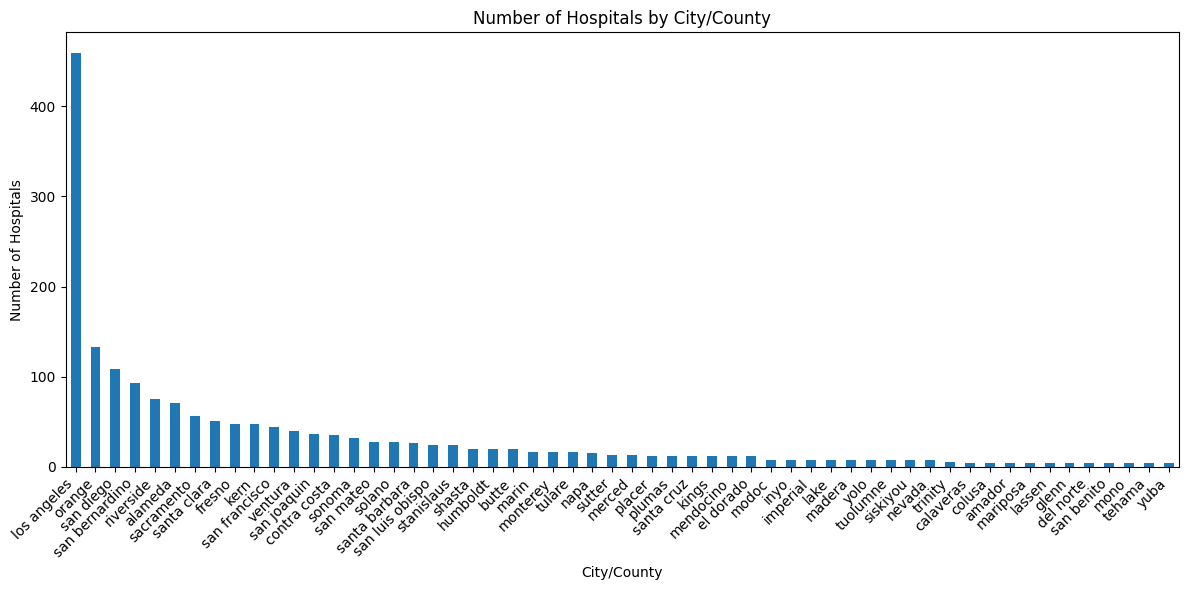

In [95]:
import matplotlib.pyplot as plt

# Summarize hospitals by city/county
city_counts = merged_df["county"].value_counts()
print("Number of hospitals per city/county:")
display(city_counts)

# Plot histogram of hospitals by city/county
plt.figure(figsize=(12,6))
city_counts.plot(kind='bar')
plt.title("Number of Hospitals by City/County")
plt.xlabel("City/County")
plt.ylabel("Number of Hospitals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


It is not surprising that Los Angeles has far more hospitals than other cities in California.

Even under financial shocks, people still fall ill and need to visit hospitals. Cities with more resources may still generate higher net patient revenue compared to cities with fewer resources.

In the next step, I want to examine whether cities with more healthcare resources have better financial performance after the Great Recession.

In [96]:
%%shell
ls "/content/drive/MyDrive/Colab Notebooks/milestone1CL .ipynb"

'/content/drive/MyDrive/Colab Notebooks/milestone1CL .ipynb'


In [97]:
%%shell

jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/milestone1CL .ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/milestone1CL .ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 457669 bytes to /content/drive/MyDrive/Colab Notebooks/milestone1CL .html
